In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
imdb_link = 'https://github.com/kow71/Scrapping_imdb_web/blob/master/top_movies.csv'

imdb_path = 'https://raw.githubusercontent.com/' + '/'.join(imdb_link.split('/')[3:5]) + '/' + '/'.join(imdb_link.split('/')[6:])

df = pd.read_csv(imdb_path)

In [35]:
df.head()

,title,year,duration,rate,rating,rating_count,image_url
0,1. The Shawshank Redemption,1994,2h 22m,R,9.3,3M,https://m.media-amazon.com/images/M/MV5BMDAyY2...
1,2. The Godfather,1972,2h 55m,R,9.2,2.1M,https://m.media-amazon.com/images/M/MV5BYTJkNG...
2,3. The Dark Knight,2008,2h 32m,PG-13,9.0,3M,https://m.media-amazon.com/images/M/MV5BMTMxNT...
3,4. The Godfather Part II,1974,3h 22m,R,9.0,1.4M,https://m.media-amazon.com/images/M/MV5BNzc1OW...
4,5. 12 Angry Men,1957,1h 36m,Approved,9.0,901K,https://m.media-amazon.com/images/M/MV5BYjE4Nz...


In [36]:
# Hàm để chuyển đổi thời gian từ dạng 'Xh Ym' sang giây
def convert_to_seconds(duration):
    hours = 0
    minutes = 0
    if 'h' in duration:
        hours = int(duration.split('h')[0])
        duration = duration.split('h')[1]
    if 'm' in duration:
        minutes = int(duration.split('m')[0].strip())
    return hours * 3600 + minutes * 60

# Áp dụng hàm convert_to_seconds vào cột 'duration'
df['duration'] = df['duration'].apply(convert_to_seconds)

Symbols like "R," "PG-13," "Approved," etc., are classifications or ratings for movies according to standards set by organizations like the MPAA (Motion Picture Association of America). They indicate the recommended age and content suitability for films. Below are the meanings of each type:
- R (Restricted)
- PG-13 (Parents Strongly Cautioned)
- Approved: This is an older form of classification, typically indicating that the film has been censored and deemed suitable for all audiences at that time
- PG (Parental Guidance Suggested)
- Not Rated: The movie has not been officially rated by a censorship body.
- G (General Audiences): Movies are suitable for all ages.
- NC-17 (Adults Only): Movies are for audiences aged 18 and older.
- Passed: Similar to "Approved," this is an older term indicating that the film has passed the censorship process.


<ipython-input-37-f34ba1d7a635>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='rate', data=df, palette='viridis')


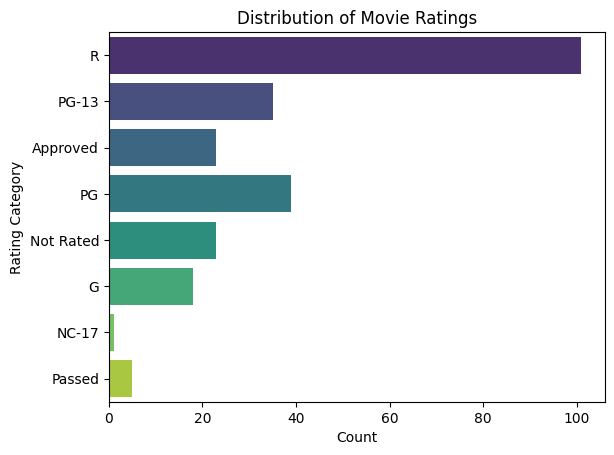

In [37]:
# See the percentage of movies that fall under the rating levels (R, PG-13, Approved, etc.).
sns.countplot(y='rate', data=df, palette='viridis')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Count')
plt.ylabel('Rating Category')
plt.show()

We can see that most of the movies (100/250) are age-restricted (17+).

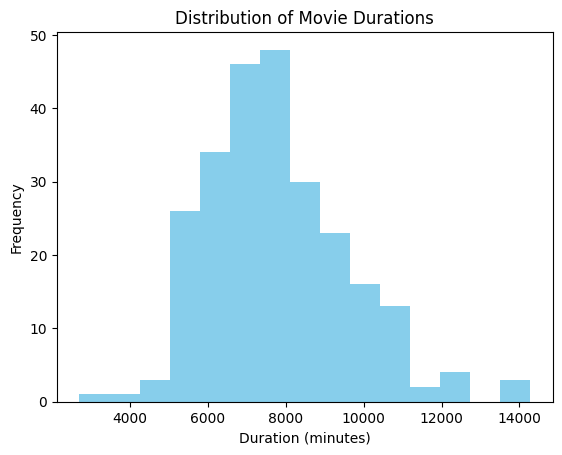

In [38]:
# Distribution of Movie Durations
plt.hist(df['duration'], bins=15, color='skyblue')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

Most movies have a duration of 100-133 minutes.

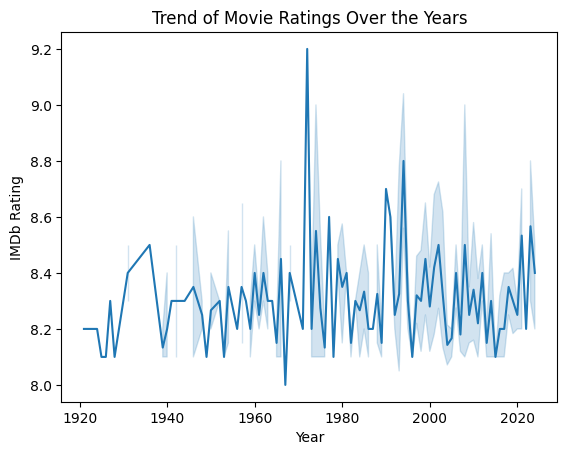

In [39]:
# Trend of Movie Ratings Over the Years
df['year'] = df['year'].astype(int)
sns.lineplot(x='year', y='rating', data=df)
plt.title('Trend of Movie Ratings Over the Years')
plt.xlabel('Year')
plt.ylabel('IMDb Rating')
plt.show()


Movies released in 1971-1972 were highly regarded by viewers.

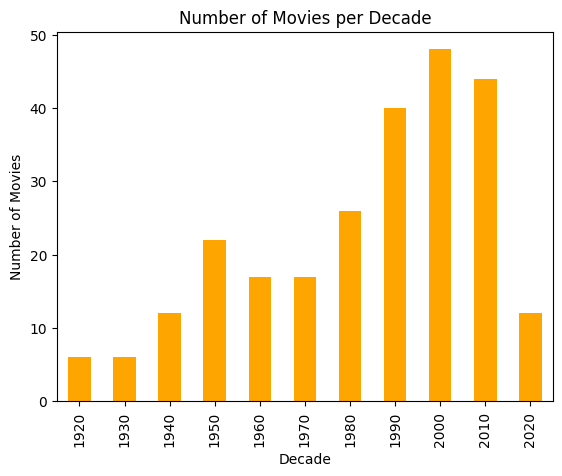

In [40]:
# Number of Movies per Decade
df['decade'] = (df['year'] // 10) * 10
decade_count = df['decade'].value_counts().sort_index()

decade_count.plot(kind='bar', color='orange')
plt.title('Number of Movies per Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Movies')
plt.show()


The movies released in the early 2000s made it into the top 250 most popular films.

0    3000000.0
1    2100000.0
2    3000000.0
3    1400000.0
4     901000.0
Name: rating_count, dtype: float64


<ipython-input-41-dd351de80f6b>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='title', x='rating_count', data=top_movies, palette='Blues_r')


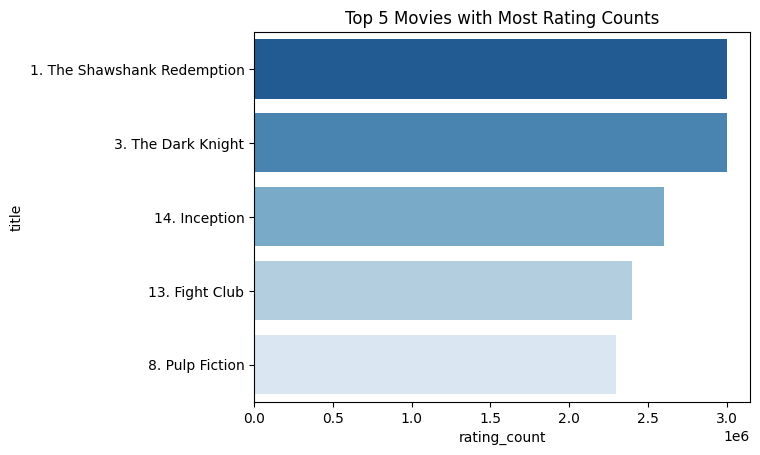

In [41]:
# Top 5 Movies with Most Rating Counts
def convert_rating_count(value):
    if isinstance(value, object):
        if 'M' in value:
            return float(value.replace('M', '')) * 1_000_000
        elif 'K' in value:
            return float(value.replace('K', '')) * 1_000
    return value

# Áp dụng hàm chuyển đổi cho cột 'rating_count'
df['rating_count'] = df['rating_count'].apply(convert_rating_count)

# Kiểm tra xem cột 'rating_count' đã được chuyển đổi thành công
print(df['rating_count'].head())

# Chọn 5 bộ phim có số lượng đánh giá nhiều nhất
top_movies = df.nlargest(5, 'rating_count')

# Vẽ đồ thị
sns.barplot(y='title', x='rating_count', data=top_movies, palette='Blues_r')
plt.title('Top 5 Movies with Most Rating Counts')
plt.show()


<ipython-input-43-f3ca5b5c99a8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rate', y='rating', data=df, palette='Set2')


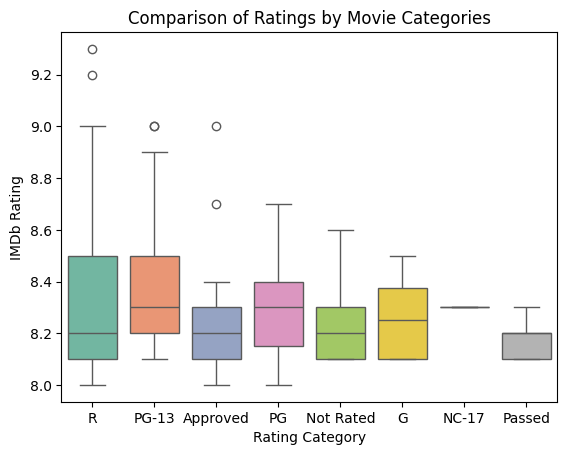

In [43]:
# Comparison of Ratings by Movie Categories
sns.boxplot(x='rate', y='rating', data=df, palette='Set2')
plt.title('Comparison of Ratings by Movie Categories')
plt.xlabel('Rating Category')
plt.ylabel('IMDb Rating')
plt.show()


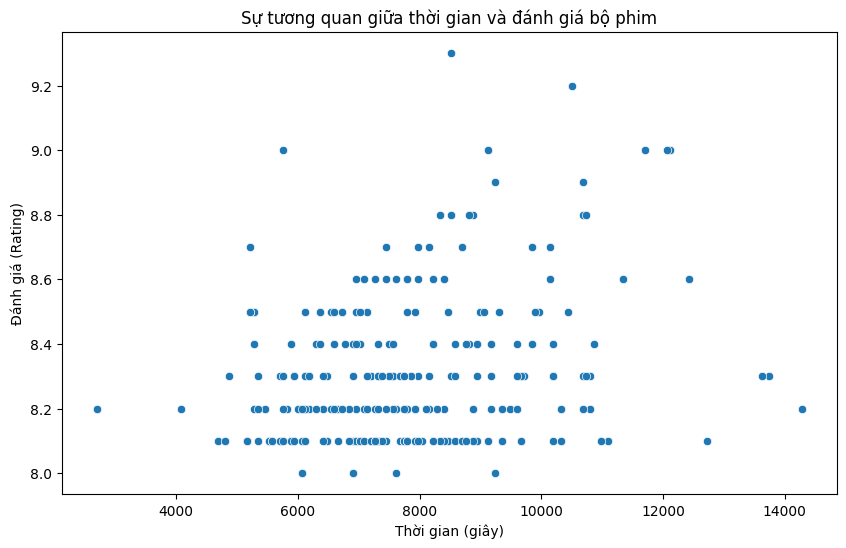

0.2845559944893683

In [44]:
# Vẽ đồ thị phân tán để xem sự tương quan giữa thời gian và rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration', y='rating', data=df)
plt.title('Sự tương quan giữa thời gian và đánh giá bộ phim')
plt.xlabel('Thời gian (giây)')
plt.ylabel('Đánh giá (Rating)')
plt.show()

# Tính hệ số tương quan Pearson giữa 'duration_minutes' và 'rating'
correlation = df['duration'].corr(df['rating'])
correlation

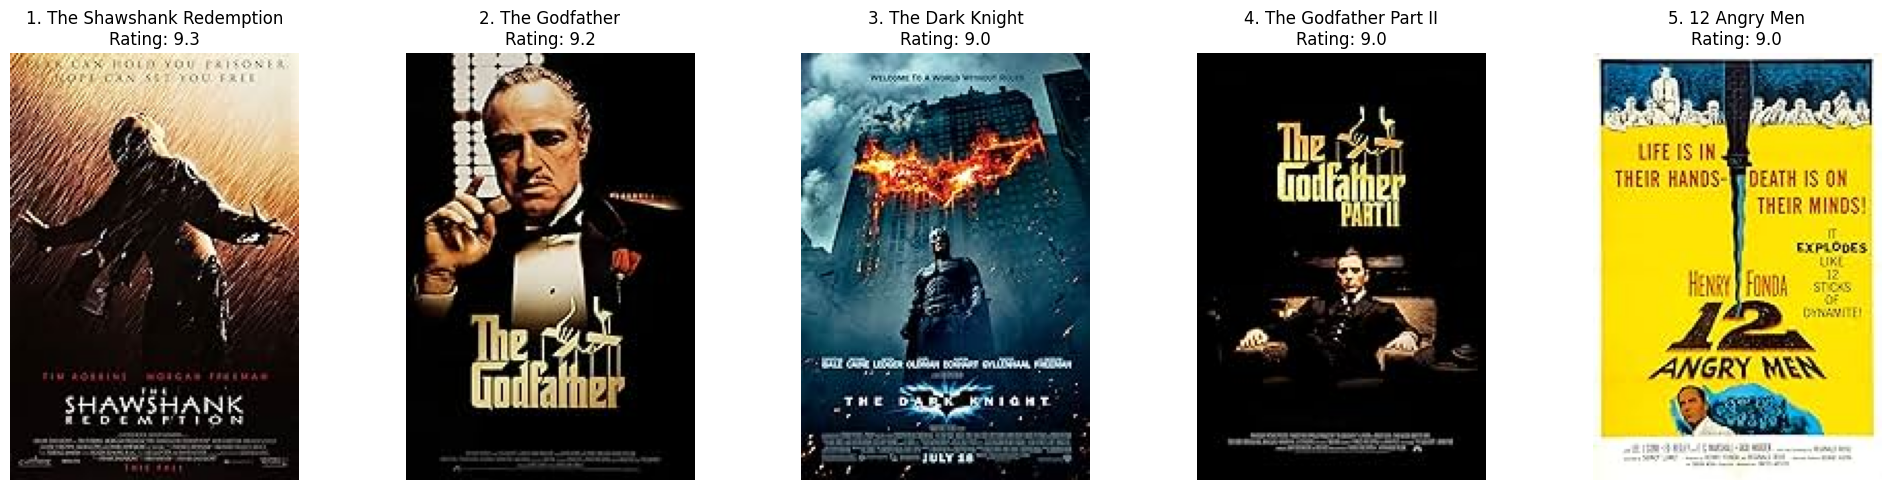

In [45]:
import matplotlib.pyplot as plt
import requests
from io import BytesIO
from PIL import Image  # Thêm dòng này để import Image từ thư viện Pillow

# Lọc ra 5 bộ phim có rating cao nhất
top_5_movies = df.nlargest(5, 'rating')

# Tạo hình vẽ để sắp xếp các ảnh gọn gàng (5 ảnh)
fig, axes = plt.subplots(1, 5, figsize=(20, 5))  # 1 hàng, 5 cột

# Duyệt qua 5 bộ phim và in ảnh
for i, (index, row) in enumerate(top_5_movies.iterrows()):
    img_url = row['image_url']  # URL ảnh của bộ phim
    img = Image.open(BytesIO(requests.get(img_url).content))  # Tải ảnh từ URL
    axes[i].imshow(img)
    axes[i].axis('off')  # Tắt trục toạ độ
    axes[i].set_title(f"{row['title']}\nRating: {row['rating']}")  # Tên bộ phim và rating

# Hiển thị kết quả
plt.tight_layout()
plt.show()
